<a href="https://colab.research.google.com/github/ALdoMartineCh16/Analisis-Exploratorio-de-Datos-Espaciales/blob/main/SESION_14_AEDE_METODO_DE_MONTECARLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1QyjJW7NL2WDfnVZ0_MqAfH6Slkal1DJA" width="150">

$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Ciencia \ de \ la \ Computación \ UNSA}$

---

# <center>  $Capitulo \ 6$


### <center> $Método \ de \ Montecarlo$


**Sesión de Laboratorio 14 :** Método de Montecarlo

**Profesor:** SERGIO MOISES AQUISE ESCOBEDO

**Estudiante:** Aldo Raúl Martinez Choque

---





# **El Método de Montecarlo**

Habitualmente se utiliza la denominación Monte Carlo para describir cualquier método de cálculo que utilice números aleatorios pero autores como Rubinstein (1981), Ripley (1987) y Lewis y Orav (1989), subrayan la conveniencia de utilizar este término sólo para usos específicos como la "integración Monte Carlo" o el "muestreo Monte Carlo", y utilizar el término "simulación estocástica" para los experimentos que hacen uso de series de números aleatorios generadas por ordenador.

## **Ley de los grandes números**

Sea $X_1,X_2,.…, X_n$  una muestra de variables aleatorias, y $g:R \rightarrow R $ tal que $E(g(X_i))=\mu$ y $V(g(X_i))=\sigma^2$ entonces


$$\lim_{n \rightarrow \infty} \frac{g(X_1)+...+g(x_n)}{n}=\mu $$



## **Integración numérica usando el Método de Montecarlo**


Cálculo de integrales por Montecarlo En el caso que nos ocupa, se desea estimar la integral de una función $g$ continua. Esta integral puede verse como el cálculo del valor esperado de la función g cuando se aplica a una variable aleatoria con distribución uniforme.

Supongamos que el intervalo de integración es $[0, 1]$ y sea $X_1,X_2,.…, X_n$  una muestra de variables aleatorias,
independientes con distribución uniforme en el intervalo $[0, 1]$, entonces

$$\displaystyle\int_{0}^{1}g(x)dx=E(g(X))$$

$$\displaystyle\int_{0}^{1}g(x)dx \approx \frac{1}{n}\sum_{i=1}^ng(x_i)$$

Cualquier  integral sobre el intervalo $[a, b]$ se puede transformar a una integral sobre el intervalo [0, 1]  con el siguiente cambio de variable  $x = a + (b - a)u$ , luego  $x_i = a + (b - a)u_i, u_i\in U(0,1)$ así


$$\int_{a}^{b}g(x)dx \approx \frac{b-a}{n}\sum_{i=1}^ng(a+(b-a)u_i)$$

**Ejemplo**

Hallar

$$\int_0^1x^2dx$$

In [1]:
n=3000
set.seed(123)
x=runif(n,0,1)
x=round(x,4)


In [2]:
gx=x^2
gx=round(gx,4)


In [3]:
(1/n)*sum(gx)

[1] 0.3311858

**Ejemplo**

Hallar

$\displaystyle\int_{0}^{1}e^{-x}dx$

In [4]:
n=8
set.seed(274)
x=runif(n)
x=round(x,4)
x

[1] 0.6299 0.0367 0.4060 0.8640 0.4280 0.7254 0.7183 0.6987

In [5]:
gx=exp(-x)
gx=round(gx,4)
gx

[1] 0.5326 0.9640 0.6663 0.4215 0.6518 0.4841 0.4876 0.4972

In [6]:
(1/n)*sum(gx)

[1] 0.5881375

In [7]:
n =8
set.seed(274)
x =runif(n)
gx=exp(-x)
Estimador =sum(gx)/n
Estimador

[1] 0.5881381

In [8]:
n =10000
x =runif(n)
set.seed(274)
gx=exp(-x)
Estimador =mean(gx)
Estimador

[1] 0.6312889

Hallando su integral analiticamente por sustitucion o cambio de variable obtenemos

$$\displaystyle\int_{0}^{1}e^{-x}dx=1-e^{-1}$$

In [9]:
I=(1 - exp(-1))
I

[1] 0.6321206

**Ejemplo**

Hallar

$\displaystyle\int_{0}^{1}xe^{x²}dx$

In [11]:
n =1000000
set.seed(274)
x =runif(n)
gx=x*exp(x^2)
Estimador =mean(gx)
Estimador

[1] 0.859037

Hallando su integral analiticamente por sustitucion o cambio de variable obtenemos

$$\displaystyle\int_{0}^{1}xe^{x^2}dx=0.5(e-1)=0.8591 $$

**Ejemplo**: Hallar


$$\displaystyle\int_{1}^{3}xe^{x^2}dx$$

In [12]:
n=1000000
set.seed(143)
ui=runif(n,0,1)

In [13]:
a=1
b=3
xi=a+(b-a)*ui

In [14]:
gxi=xi*exp(xi^2)

In [15]:
I=(b-a)*(1/n)*sum(gxi)
I

[1] 4036.213

In [16]:
integrate(function(x) x*exp(x^2), lower = 1, upper = 3)

4050.183 with absolute error < 2e-06

**Ejemplo**: Hallar


$$\displaystyle\int_{1}^{3}\frac{e^x}{1+e^x}dx$$

In [17]:
n=100000
set.seed(234)
ui=runif(n,0,1)
ui=round(ui,4)


In [18]:
a=1
b=3
xi=a+(b-a)*ui


In [19]:
gxi=exp(xi)/(1+exp(xi))
gxi=round(gxi,4)


In [20]:
I=((b-a)/n)*sum(gxi)
I

[1] 1.735104

$$\displaystyle\int_{1}^{3}\frac{e^x}{1+e^x}dx=1.73532566405552$$

In [21]:
I=log(1+(exp(1))^3)-log(1+(exp(1)))
I

[1] 1.735326

In [22]:
integrate(function(x) exp(x)/(1+exp(x)), lower = 1, upper = 3)

1.735326 with absolute error < 1.9e-14

**Ejemplo**

Hallar

$\displaystyle\int_{2}^{4}e^{-x}dx$

In [23]:
n = 1000
a=2
b=4
set.seed(274)
u =runif(n)
x=a+(b-a)*u
gxi=exp(-x)
Estimador=(b-a)*sum(gxi)/n
Estimador

[1] 0.115709

In [24]:
n = 1000
a=2
b=4
set.seed(274)
u =runif(n)
x=a+(b-a)*u
gxi=exp(-x)
Estimador=(b-a)*mean(gxi)
Estimador

[1] 0.115709

Hallando su integral analiticamente por sustitucion o cambio de variable obtenemos

$$\displaystyle\int_{2}^{4}e^{-x}dx=e^{-2}-e^{-4}$$

In [25]:
I=exp(-2) - exp(-4)
I

[1] 0.1170196

## **Cálculo de probabilidades de la distribución normal estandar**

Si $X \sim N(0,1)$ usando la regla empirica tenemos

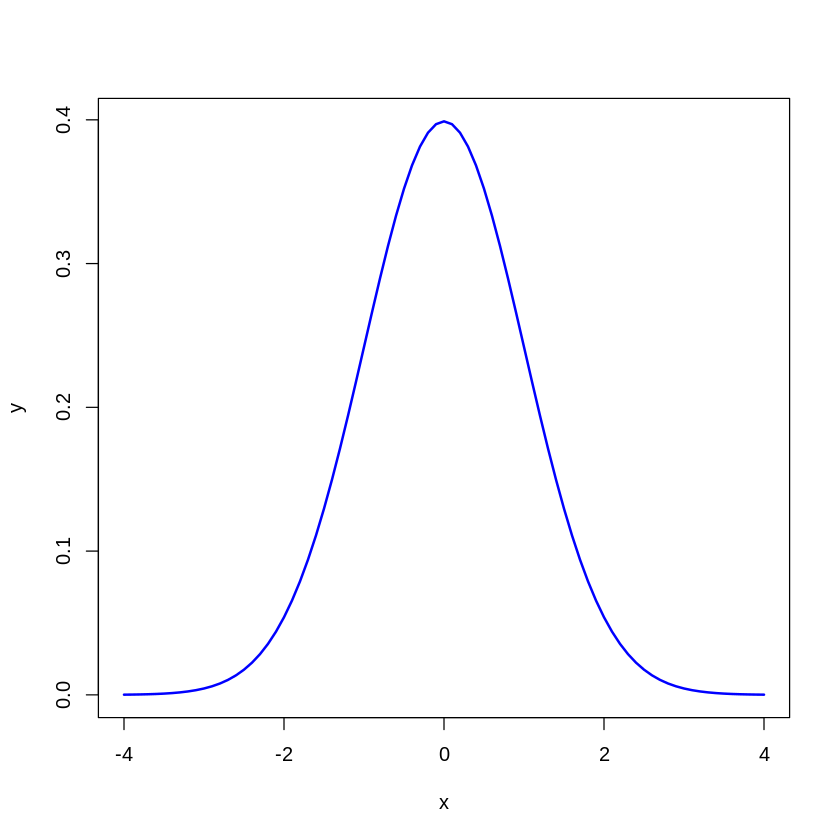

In [26]:
x=seq(-4,4,0.1)
y=dnorm(x,0,1)
plot(x,y, type="l", lwd=2,col="blue")

$$\int_{-\infty}^{\infty}f(x)dx=1$$

$$I=\int_{-4}^{4}f(x)dx \approx 1$$

In [27]:
I=pnorm(4,0,1)-pnorm(-4,0,1)
I

[1] 0.9999367

---

**Ejemplo:** Sea $X \sim N(0,1)$ estimar $P(X<1.23)$

In [28]:
n = 10000
a=-4
b=1.23
set.seed(274)
x =runif(n,a,b)
gx=dnorm(x,0,1)
I=(b-a)*mean(gx)
I

[1] 0.8961835

Usando la distribución normal estandar

In [29]:
pnorm(1.23,0,1)

[1] 0.8906514

**Usando la generacion de muestras aleatorias**

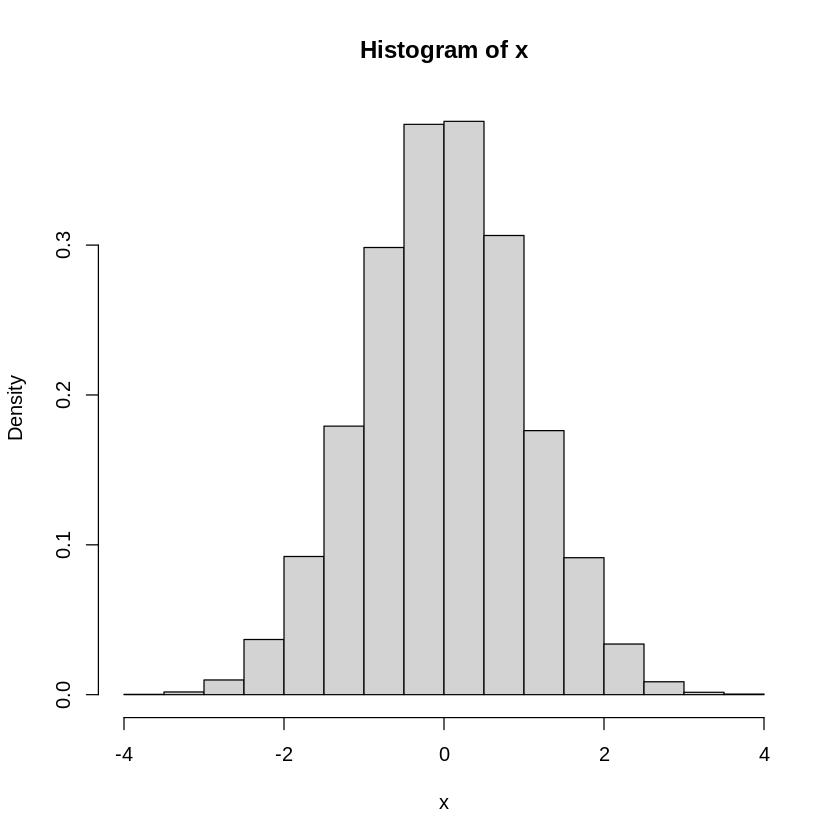

In [30]:
n = 10000
x=rnorm(n,0,1)
hist(x,prob=TRUE)

In [31]:
x=c(-8,2,5,-3,1,6,7)
x<3

[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE

In [32]:
mean(x<3)

[1] 0.5714286

In [33]:
4/7

[1] 0.5714286

Para calcular $P(a<Z<b)$ usando el método de montecarlo, seguimos los siguientes pasos

1. Generar muestras aleatorias  de una distribución normal estándar $z_i, i=1,...n$

$$rnorm(n,0,1)$$

2. Contar las muestras que estan en el intervalo
$[a,b]$ definir la variable indicadora $I_i$

 * $I_i=1$ si $z_i \in [a,b]$
 * $I_i=0$ si $z_i \notin [a,b]$

3. Calcular la probabilidad estimada

$$P(a<Z<b) \approx \frac{\displaystyle \sum_{i=1}^n I_i}{n}$$


**Ejemplo:** Sea $X \sim N(0,1)$ estimar $P(X<1.23)$

In [34]:
n=100000
x=rnorm(n,0,1)
I=mean(x<1.23)
I

[1] 0.88938

**Ejemplo:** Sea $X \sim N(0,1)$ estimar $P(X<-1.83)$

In [35]:
n=100000
x=rnorm(n,0,1)
I=mean(x < -1.83)
I

[1] 0.03351

In [36]:
pnorm(-1.83,0,1)

[1] 0.03362497

**Ejemplo:** Sea $X \sim N(0,1)$ estimar $P(X>2)$

In [37]:
n=100000
x=rnorm(n,0,1)
I=mean(x>2)
I

[1] 0.02353

Usando la distribución normal estandar

In [38]:
1-pnorm(2,0,1)

[1] 0.02275013

# **Montecarlo para inferencia**

Los métodos de Monte Carlo se pueden aplicar para estimar parámetros de la distribución de muestreo de una estadística, probabilidades o funciones de una distribución usando grandes cantidades de simulaciones aleatorias

Supongamos que $X_1,. . ., X_n$ es una muestra aleatoria de la distribución de $X$. Un
estimador $\hat{\theta}$ para un parámetro $\theta$ es una función $n$ variables
$\hat{\theta} = \hat{\theta} (X_1,..., X_n)$

Aproximación de la media $\mu$ y varianza $\sigma^2$ de una distribución normal

## **Aproximación de la media y la varianza de una distribución normal**

**Ejemplo:** Estimar $\mu$ y $\sigma ^2$ para la variable aleatoria $X\sim N(5,9)$

In [39]:
set.seed(25)
n=100000
x=rnorm(n,5,3)

In [40]:
Ex=mean(x)
cat("Media estimada",Ex)

Media estimada 5.00273

In [41]:
Vx=var(x)
cat("Varianza estimada",Vx)

Varianza estimada 9.043212

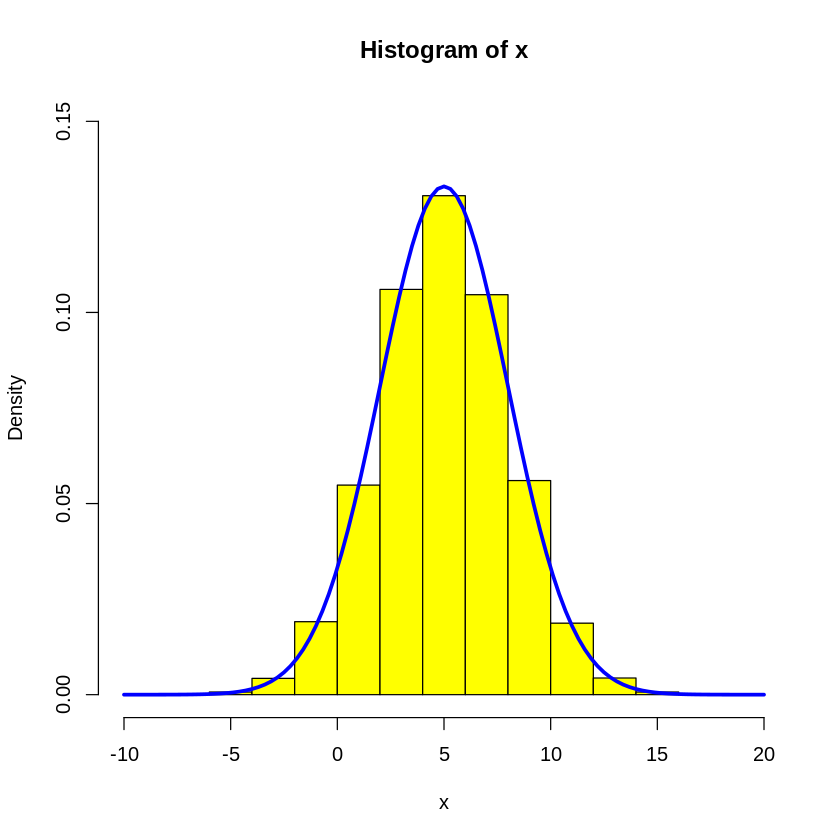

In [42]:
hist(x,prob=TRUE,col="yellow",ylim=c(0,0.15))
curve(dnorm(x,5,3),add=TRUE,lwd=3,col="blue")

## **Aproximación del parametro $p$ de la distribución Binomial**

**Ejemplo:** Estimar $p$ en $X\sim Bin(n,p)$  con $n=10$ y $p=0.3$

In [43]:
set.seed(23)
N = 100
n = 10
p= 0.3
muestra=rbinom(N,n,p)
# La estimación de p es la media de éxitos / n)
p_est=mean(muestra)/n
cat("Proporción estimada:", p_est)
p

Proporción estimada: 0.313

[1] 0.3

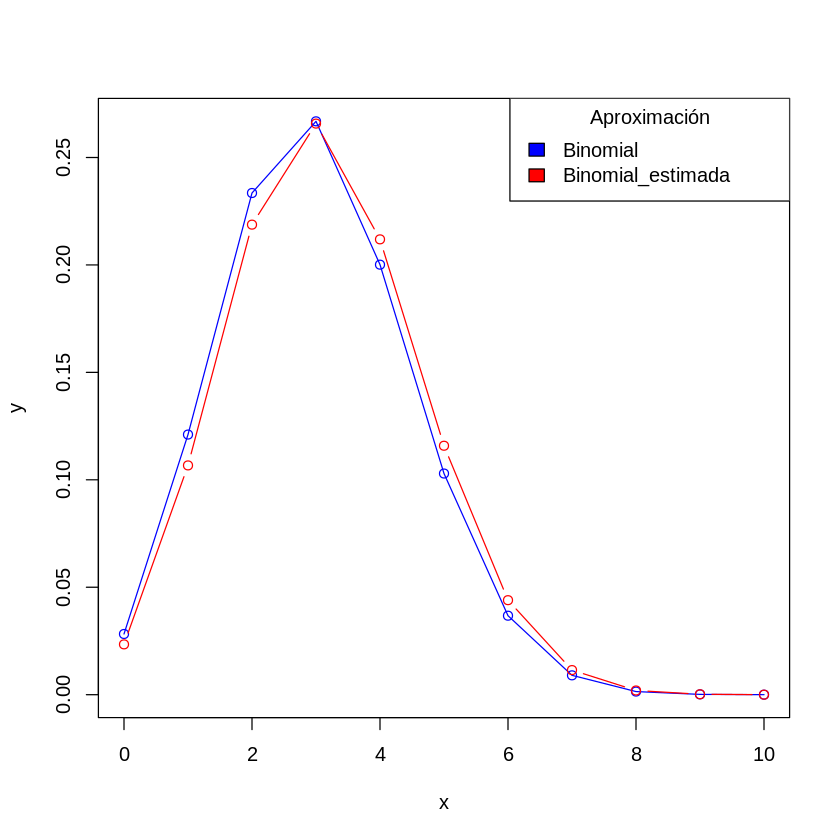

In [44]:
x=seq(0,n,1)
y=dbinom(x,n,p)
plot(x,y,type='o',col="blue")
y1=dbinom(x,n,p_est)
lines(x,y1,type='b',col="red")
legend(x = "topright", legend = c("Binomial ", "Binomial_estimada"), fill = c("blue", "red"),
       title = "Aproximación")

## **Estimacion del error estandar de la media**


El error estandar de la media muestral $\overline X$ de tamaño $n$ esta dado por:


 $$\sigma_{\overline X}=\frac{\sigma}{\sqrt{n}}$$, donde

\begin{equation}
\hat {\sigma_{\overline X}}=\sqrt{\frac{1}{N}\sum\limits_{i=1}^N(\overline X_i-\mu)^2}
\end{equation}

**Ejemplo:** Estimar $\sigma_{\overline X}$ para la media de la distribucion normal  $X\sim N(\mu,\sigma^2)$  con $\mu=5$ y $\sigma=2$, on tamaño de muestra $n=30$

In [45]:
set.seed(123)
mu=5          # Media teorica
sigma=2       # Desviación estándar teorica
n=30          # Tamaño de cada muestra
N=10000       # Número de muestras a generar

In [46]:
M=matrix(0,1,N)
#M

In [47]:
M=matrix(0,1,N)
for(i in 1:N){
muestra=rnorm(n,mu,sigma)
#print(muestra)
M[i]=mean(muestra)
#print(M[i])
}

Error muestral estimado $\hat {\sigma_{\overline X}}$

In [48]:
S_est=sd(M)
S_est

[1] 0.3613641

Error muestral estimado $\sigma_{\overline X}$

In [49]:
Sx=sigma/sqrt(n)
Sx

[1] 0.3651484

**Usando el comando $replicate$**

In [50]:
set.seed(123)
mu=5          # Media teorica
sigma=2       # Desviación estándar teorica
n=30          # Tamaño de cada muestra
N=10000       # Número de muestras a generar

In [51]:
# Matriz para almacenar las medias de cada muestra
Mm =replicate(N,{muestra=rnorm(n,mu,sigma)
mean(muestra)
})

In [52]:
# Error estandar estimado (desviación estándar de las medias muestrales)
S_estimado = sd(Mm)
S_estimado

[1] 0.361729

In [53]:
Sx = sigma / sqrt(n)
Sx

[1] 0.3651484

---

## **Trabajo encargado**

1. Usando el metodo de Montecralo. Estimar $\mu$ y $\sigma ^2$ para la variable aleatoria $X\sim N(5,9)$


In [54]:
set.seed(25)
n=100000
x=rnorm(n,5,3)

In [55]:
Ex=mean(x)
cat("Media estimada",Ex)

Media estimada 5.00273

In [56]:
Vx=var(x)
cat("Varianza estimada",Vx)

Varianza estimada 9.043212

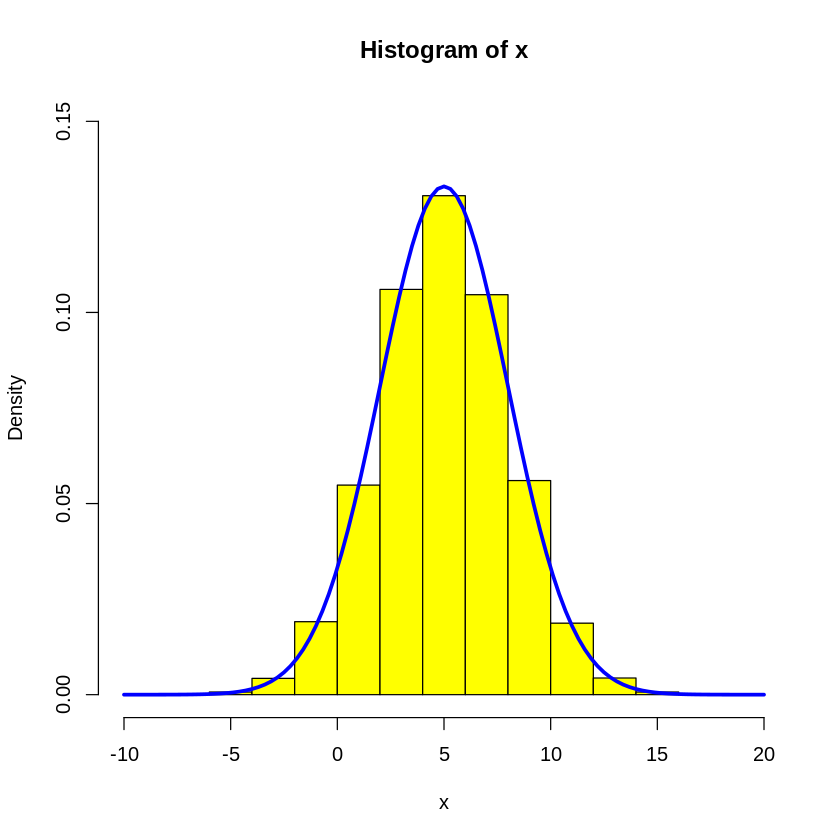

In [57]:
hist(x,prob=TRUE,col="yellow",ylim=c(0,0.15))
curve(dnorm(x,5,3),add=TRUE,lwd=3,col="blue")

2. Estimar $\sigma_{\overline X}$ para la media de la distribucion normal  $X\sim N(\mu,\sigma^2)$  con $\mu=75$ y $\sigma=1.2$, con tamaño de muestra $n=55$

In [58]:
set.seed(123)
mu=75          # Media teorica
sigma=1.2       # Desviación estándar teorica
n=55          # Tamaño de cada muestra
N=10000       # Número de muestras a generar

In [59]:
M=matrix(0,1,N)
M

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [61]:
M=matrix(0,1,N)
for(i in 1:N){
  muestra=rnorm(n,mu,sigma)
  #print(muestra)
  M[i]=mean(muestra)
  #print(M[i])
}

Error muestral estimado $\hat {\sigma_{\overline X}}$

In [62]:
S_est=sd(M)
S_est

[1] 0.1615253

Error muestral estimado $\sigma_{\overline X}$

In [63]:
Sx=sigma/sqrt(n)
Sx

[1] 0.161808

3. Un hospital quiere estimar el tiempo promedio de espera (en minutos) en urgencias. Registra el tiempo de 100 pacientes cada día durante 200 días y calcula el error estandar muestral para evaluar la variabilidad.

In [67]:
set.seed(456)
# Simulamos los datos
num_dias = 200
pacientes_por_dia = 100

In [68]:
# Tiempos de espera simulados (en minutos)
tiempos_espera = replicate(num_dias, rnorm(pacientes_por_dia, mean = 30, sd = 10))

In [70]:
# Calculamos la media de tiempo de espera para cada día
medias_diarias = apply(tiempos_espera, 2, mean)

In [71]:
# Calculamos el error estándar de la media (SEM)
sem = sd(medias_diarias)
cat("El error estándar de la media (SEM) es:", sem, "minutos\n")

El error estándar de la media (SEM) es: 0.9512958 minutos


4. Un agricultor quiere estimar el rendimiento promedio de tomates por planta (en kg) en su campo. Como no puede medir todas las plantas, toma muestras de 50 plantas en diferentes sectores y repite este proceso 500 veces para calcular el error estandar muestral.

In [73]:
set.seed(789)
# Simulamos los datos
num_muestras = 500
plantas_por_muestra = 50

In [74]:
# Rendimiento simulado (en kg)
rendimiento = replicate(num_muestras, rnorm(plantas_por_muestra, mean = 2, sd = 0.5))

In [75]:
# Calculamos el rendimiento promedio para cada muestra
rendimiento_promedio = apply(rendimiento, 2, mean)

In [76]:
# Calculamos el error estándar de la media (SEM)
sem_rendimiento = sd(rendimiento_promedio)
cat("El error estándar de la media (SEM) del rendimiento es:", sem_rendimiento, "kg\n")

El error estándar de la media (SEM) del rendimiento es: 0.07396965 kg


5. Una compañía eléctrica analiza el consumo promedio mensual (en kWh) en 50 hogares. Repite el muestreo 300 veces para estimar el SEM y planificar la demanda energética.

In [78]:
set.seed(159)
# Simulamos los datos
num_muestras = 300
hogares_por_muestra = 50

In [79]:
# Consumo simulado (en kWh)
consumo = replicate(num_muestras, rnorm(hogares_por_muestra, mean = 500, sd = 100))

In [80]:
# Calculamos el consumo promedio para cada muestra
consumo_promedio = apply(consumo, 2, mean)

In [81]:
# Calculamos el error estándar de la media (SEM)
sem_consumo = sd(consumo_promedio)
cat("El error estándar de la media (SEM) del consumo es:", sem_consumo, "kWh\n")

El error estándar de la media (SEM) del consumo es: 14.74468 kWh


6. Aproximar los coeficientes $\beta_0$, y $\beta_1$ en el modelo $Y=\beta_0 + \beta_1X+\epsilon$. De ejemplos

In [83]:
# 1. Definir los coeficientes verdaderos y simular datos
set.seed(123)
beta0_real = 2
beta1_real = 3
n = 100
X = runif(n, 0, 10)
epsilon = rnorm(n, 0, 2) # Ruido
Y = beta0_real + beta1_real * X + epsilon

In [84]:
# 2. Estimar los coeficientes usando el modelo de regresión lineal
modelo = lm(Y ~ X)
beta0_estimado = coef(modelo)[1]
beta1_estimado = coef(modelo)[2]

In [85]:
# 3. Mostrar los resultados
cat("Beta0 real:", beta0_real, "\n")
cat("Beta0 estimado:", beta0_estimado, "\n")
cat("Beta1 real:", beta1_real, "\n")
cat("Beta1 estimado:", beta1_estimado, "\n")

Beta0 real: 2 
Beta0 estimado: 1.98208 
Beta1 real: 3 
Beta1 estimado: 2.982034 


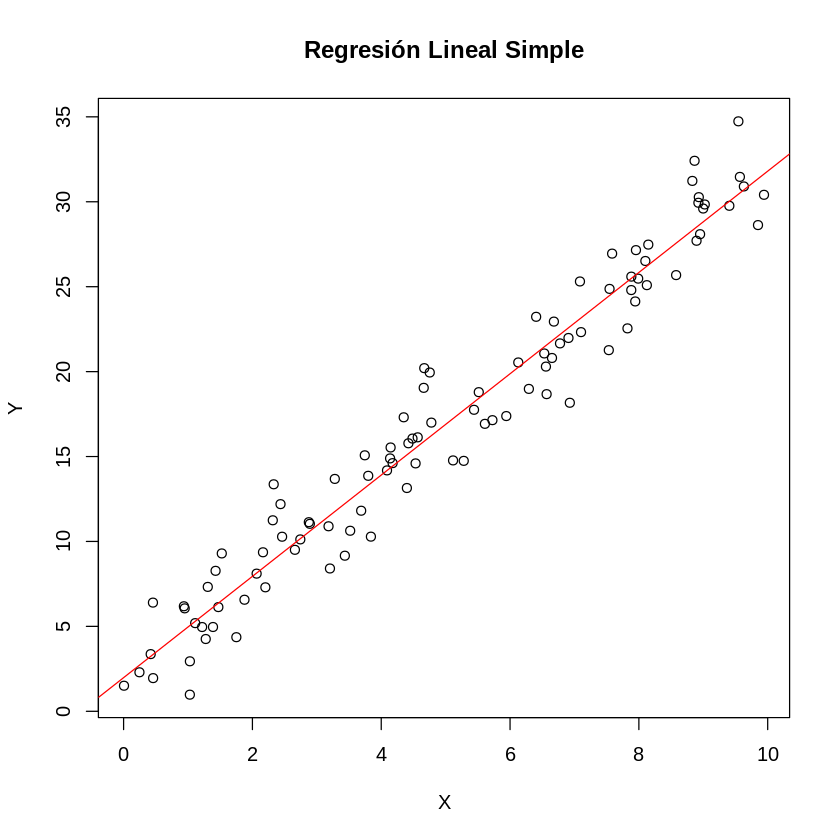

In [86]:
# 4. Visualizar los datos y la línea de regresión
plot(X, Y, main = "Regresión Lineal Simple", xlab = "X", ylab = "Y")
abline(modelo, col = "red")